<a href="https://colab.research.google.com/github/ZahibVentura/M-todos-de-Optimizaci-n-/blob/main/Lotk_Volterra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt    #Se importan las librerias
from scipy.integrate import odeint
import random as rd

In [ ]:
y0 = [20,2] #poblacion inicial de conejos y lobos
t = np.linspace(0,30,100) #tiempo inicial y final con el numero de pasos dados

In [ ]:
alpha = 1.1
beta = 0.4  #Parametos de las ecuaciones diferenciales
gamma = 0.4
delta = 0.1

params = [alpha,beta,gamma,delta] #parametros de las ecuaciones diferenciales guardados en un arreglo

In [ ]:
def model(y,t,params):    #definimos función que calcule la poblacion al de lobos "y" y conejos "x" al tiempo t
  x = y[0]
  y = y[1]
  alpha = params[0]
  beta = params[1]    #se asignan los parametros dados a las variables
  gamma = params[2]
  delta = params[3]

#Ecuaciones de Lotk-Volterra
  dxdt = alpha*x - beta*x*y       #Cambio de la poblacion de presas
  dydt = delta*x*y - gamma*y      #Cambio de la poblacion de depredadores
  return [dxdt,dydt]  #Se regresa las poblaciones de cada uno al tiempo t

In [ ]:
z = odeint(model,y0,t,args=(params,)) #Integración numerica dada la funcion, condiciones iniciales, y parametros

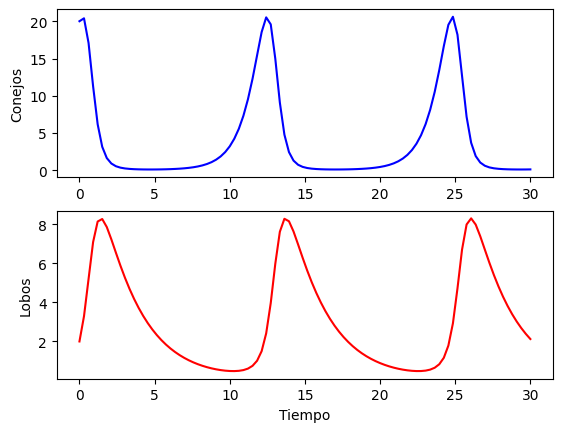

In [ ]:
#Grafico de las funciones
f,(ax1,ax2) = plt.subplots(2)

linel1 = ax1.plot(t,z[:,0],color="b")
linel2 = ax2.plot(t,z[:,1],color="r")

ax1.set_ylabel("Conejos")
ax2.set_ylabel("Lobos")
ax2.set_xlabel("Tiempo")
plt.show()

In [ ]:
"""a = 0.1
b = 0.01
c = 0.9
d = 0.3

P = 20
D = 5
t0 =0
T =100
i = 0

listaP = [P]
listaD = [D]


while t0 <= T:
  lmb_P = P*(a - b*D)
  lmb_D = D*(-c + d*P)

  Delta_tp = np.random.exponential(abs(lmb_P))
  Delta_td = np.random.exponential(abs(lmb_D))
  t0 += Delta_td
  y = rd.uniform(0,1)

  if y < Delta_tp:
    P += 1
  else:
    P -= 1
    D += 1
  listaP.append(P)
   if P < 0:
      D -= 1

  #if P < D:
     P += 1
    else:
      D += 1
  #if y < Delta_td:

    #D -= 1
   else:
    D -= 1
  listaD.append(D)

  if P == 0:
   break
  if D == 0:
   break
  i += 1
  print(f'Iteración {i-1} --> Presas: {P},Depredadores {D}, Tiempo: {t0}')
  #print(f'Iteración {i+1} --> Presas: {P}, Depredadores: {D}') """

"a = 0.1\nb = 0.01\nc = 0.9\nd = 0.3\n\nP = 20\nD = 5\nt0 =0\nT =100\ni = 0\n\nlistaP = [P]\nlistaD = [D]\n\n\nwhile t0 <= T:\n  lmb_P = P*(a - b*D)\n  lmb_D = D*(-c + d*P)\n\n  Delta_tp = np.random.exponential(abs(lmb_P))\n  Delta_td = np.random.exponential(abs(lmb_D))\n  t0 += Delta_td\n  y = rd.uniform(0,1)\n\n  if y < Delta_tp:\n    P += 1\n  else:\n    P -= 1\n    D += 1\n  listaP.append(P)\n   if P < 0:\n      D -= 1\n\n  #if P < D:\n     P += 1\n    else:\n      D += 1\n  #if y < Delta_td:\n\n    #D -= 1\n   else:\n    D -= 1\n  listaD.append(D)\n\n  if P == 0:\n   break\n  if D == 0:\n   break\n  i += 1\n  print(f'Iteración {i-1} --> Presas: {P},Depredadores {D}, Tiempo: {t0}')\n  #print(f'Iteración {i+1} --> Presas: {P}, Depredadores: {D}') "

In [ ]:
# @title Codigo madre
a = 1.1
b = 0.4
d = 0.4
c = 0.1

P = 20
D = 20
listaP = [P]
listaD = [D]

for i in range(2000):
  lmb_P = P*(a - b*D)
  lmb_D = D*(-c + d*P)
  Delta_tp = np.random.exponential(abs(1/lmb_P)) if lmb_P != 0 else np.inf
  Delta_td = np.random.exponential(abs(1/lmb_D)) if lmb_D != 0 else np.inf


  if Delta_tp < Delta_td:
    if P == 0:
      break
    else:
      if np.sign(lmb_P) == 1:
        P += 1
      else:
        P -= 1
  else:
    if D == 0:
      break
    else:
      if np.sign(lmb_D) == 1:
        D += 1
      else:
        D -= 1
  listaP.append(P)
  listaD.append(D)

  print(f'Iteración {i+1} --> Presas: {P}, Depredadores: {D}')

Iteración 1 --> Presas: 19, Depredadores: 20
Iteración 2 --> Presas: 18, Depredadores: 20
Iteración 3 --> Presas: 18, Depredadores: 21
Iteración 4 --> Presas: 18, Depredadores: 22
Iteración 5 --> Presas: 18, Depredadores: 23
Iteración 6 --> Presas: 17, Depredadores: 23
Iteración 7 --> Presas: 16, Depredadores: 23
Iteración 8 --> Presas: 15, Depredadores: 23
Iteración 9 --> Presas: 14, Depredadores: 23
Iteración 10 --> Presas: 13, Depredadores: 23
Iteración 11 --> Presas: 12, Depredadores: 23
Iteración 12 --> Presas: 11, Depredadores: 23
Iteración 13 --> Presas: 10, Depredadores: 23
Iteración 14 --> Presas: 10, Depredadores: 24
Iteración 15 --> Presas: 9, Depredadores: 24
Iteración 16 --> Presas: 9, Depredadores: 25
Iteración 17 --> Presas: 9, Depredadores: 26
Iteración 18 --> Presas: 8, Depredadores: 26
Iteración 19 --> Presas: 7, Depredadores: 26
Iteración 20 --> Presas: 6, Depredadores: 26
Iteración 21 --> Presas: 6, Depredadores: 27
Iteración 22 --> Presas: 5, Depredadores: 27
Itera

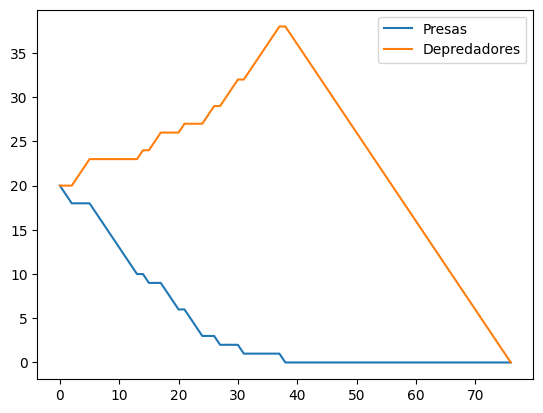

In [ ]:
plt.plot(listaP,label="Presas")
plt.plot(listaD,label="Depredadores")
plt.legend()
plt.show()

In [ ]:
a = 0.25
b = 0.27
c = 0.1
d = 0.15

P = 6
D = 9
listaP1 = [P]
listaD1 = [D]

for i in range(500):
  L_v =[]
  lmb_P_nace = P*a
  lmb_P_muere = b*P*D
  lmb_D_nace = d*D*P
  lmb_D_muere = c*D
 #print(lmb_P, lmb_D)
  Delta_tp1 = np.random.exponential(lmb_P_nace)
  Delta_td1 = np.random.exponential(lmb_D_nace)
  Delta_tp2 = np.random.exponential(lmb_P_muere)
  Delta_td2 = np.random.exponential(lmb_D_muere)
  print("Tiempo nacimiento presas: ", Delta_tp1)
  print("Tiempo nacimiento depredador: ", Delta_td1)
  print("Tiempo muerte presas: ", Delta_tp2)
  print("Tiempo muerte depredador: ", Delta_td2)


  """if Delta_tp1 <= Delta_tp2:
    if Delta_tp1 <= Delta_td1:
      if Delta_tp1 <= Delta_td2:
        t_min = Delta_tp1
      else:
        t_min = Delta_td2
    else:
      if Delta_td1 <= Delta_td2:
        t_min = Delta_td1
      else:
        t_min = Delta_td2
  else:
    if Delta_tp2 <= Delta_td1:
      if Delta_tp2 <= Delta_td2:
        t_min = Delta_tp2
      else:
        t_min = Delta_td2"""
  L_v = [Delta_tp1,Delta_tp2,Delta_td1,Delta_td2]
  t_min = min(L_v)
  R = t_min+1.5

  if -R<Delta_tp1 < R:
    P +=1
  elif -R<Delta_tp2 < R:
    P -=1
  elif -R<Delta_td1 < R:
    D +=1
  elif -R<Delta_td2 < R:
    D -=1
  listaP1.append(P)
  listaD1.append(D)
  if P == 0 or D == 0:
    break

  print(f'Iteración {i+1} --> Presas: {P}, Depredadores: {D}')

Tiempo nacimiento presas:  0.24821079407048263
Tiempo nacimiento depredador:  28.911238826070893
Tiempo muerte presas:  17.780357473955835
Tiempo muerte depredador:  0.5202087434668602
Iteración 1 --> Presas: 7, Depredadores: 9
Tiempo nacimiento presas:  0.7749193809688142
Tiempo nacimiento depredador:  4.070850679051907
Tiempo muerte presas:  23.14724176558576
Tiempo muerte depredador:  3.5633586313734575
Iteración 2 --> Presas: 8, Depredadores: 9
Tiempo nacimiento presas:  5.4046152871145505
Tiempo nacimiento depredador:  9.799507133391018
Tiempo muerte presas:  8.492441495155928
Tiempo muerte depredador:  0.09626875866269853
Iteración 3 --> Presas: 8, Depredadores: 8
Tiempo nacimiento presas:  2.2896823259287986
Tiempo nacimiento depredador:  1.4654012323697587
Tiempo muerte presas:  3.060278164081986
Tiempo muerte depredador:  0.5233229339848519
Iteración 4 --> Presas: 8, Depredadores: 9
Tiempo nacimiento presas:  1.399931106632065
Tiempo nacimiento depredador:  13.570002530467525


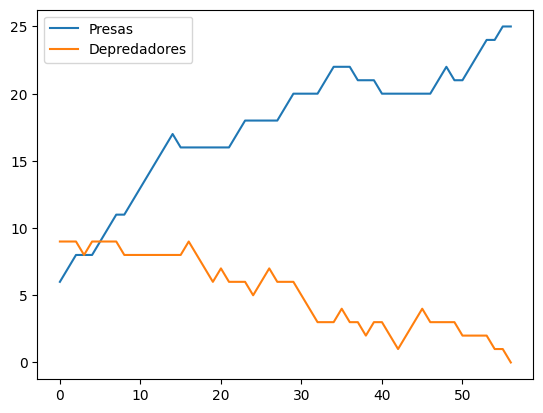

In [ ]:
plt.plot(listaP1,label="Presas")
plt.plot(listaD1,label="Depredadores")
plt.legend()
plt.show()

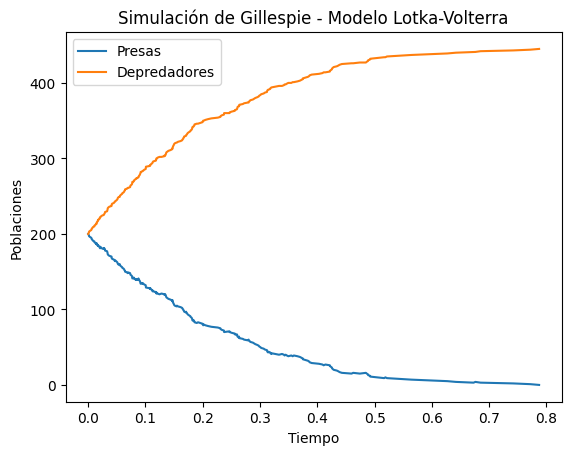

In [ ]:


# Parámetros del modelo
a = 0.9  # Tasa de crecimiento de presas
b = 0.02  # Tasa de depredación
c = 10000000  # Tasa de competencia entre depredadores

# Función para el algoritmo de Gillespie
def gillespie(a, b, c, initial_populations, max_time):
    # Inicializar poblaciones
    prey, predators= initial_populations
    time = 0
    times = [time]
    populations = [(prey, predators)]

    while time < max_time:
        # Calcular tasas de reacción
        r1 = a * prey          # Crecimiento de presas
        r2 = b * prey * predators  # Depredación

        # Suma total de tasas
        total_rate = r1 + r2

        if total_rate == 0:
            break  # Si no hay más reacciones, salir

        # Tiempo hasta el próximo evento
        tau = np.random.exponential(1 / total_rate)

        # Seleccionar el evento
        u = np.random.uniform(0, total_rate)
        if u < r1:
            prey += 1  # Aumento de presas
        elif u < r1 + r2:
            prey -= 1  # Disminución de presas por depredación
            predators += 1  # Aumento de depredadores
        else:
            predators -= 1  # Disminución de depredadores por competencia

        # Actualizar tiempo y poblaciones
        time += tau
        times.append(time)
        populations.append((prey, predators))

    return times, populations

# Parámetros iniciales
initial_populations = (200, 200)  # Presas, depredadores, competidores
max_time = 10000

# Ejecutar la simulación
times, populations = gillespie(a, b, c, initial_populations, max_time)

# Convertir a arrays para facilitar el acceso
populations = np.array(populations)

# Graficar los resultados
plt.plot(times, populations[:, 0], label='Presas')
plt.plot(times, populations[:, 1], label='Depredadores')
plt.xlabel('Tiempo')
plt.ylabel('Poblaciones')
plt.legend()
plt.title('Simulación de Gillespie - Modelo Lotka-Volterra')
plt.show()

In [ ]:
#Definimos los parámetros
a = 3.5 #Tasa de nacimientos de presas
b = 0.3 #Tasa de muertes presas
d = 0.3 #Tasa de nacimientos depredadores
c = 2.9 #Tasa de muertes depredadores

#Poblaciones iniciales
P = 30 #Presas
D = 30 #Depredadores

#Listas para guardar el cambio de las poblaciones en cada iteración
listaP1 = [P]
listaD1 = [D]

# Variables para guardar el tiempo en cada estado
tiempo = 0
listaTiempo = []

#Definimos las generaciones
n = 1000

#Iniciamos el ciclo de iteraciones
for i in range(n):

  lmb_P_nace = a*P
  lmb_P_muere = b*P*D  # 4 Transiciones
  lmb_D_nace = d*D*P
  lmb_D_muere = c*D

  #Simulamos los tiempos de cada evento
  Delta_tp1 = np.random.exponential(1/lmb_P_nace) if lmb_P_nace > 0 else np.inf
  Delta_tp2 = np.random.exponential(1/lmb_P_muere) if lmb_P_muere > 0 else np.inf
  Delta_td1 = np.random.exponential(1/lmb_D_nace) if lmb_D_nace > 0 else np.inf
  Delta_td2 = np.random.exponential(1/lmb_D_muere) if lmb_D_muere > 0 else np.inf


  R = [Delta_tp1, Delta_tp2, Delta_td1, Delta_td2] #guardamos los valores en una lista
  t_min = min(R) #Tomamos el minimo de los valores, el cual nos dice que evento ocurre primero

  #Actualizamos el tiempo en cada iteración
  tiempo += t_min
  listaTiempo.append(tiempo) #Lo guardamos en una lista

  #Decidimos que evento ocurre, considerando el tiempo minimo
  if t_min == Delta_tp1:
    if P == 0:
      break
    else:
      P += 1 #Aumentar en 1 la población de presas

  elif t_min == Delta_tp2:
    if P == 0:
      break
    else:
      P -= 1 #Disminuir en 1 la población de presas

  elif t_min == Delta_td1:
    if D == 0:
      break
    else:
      D += 1 #Aumentar en 1 la población de depredadores

  elif t_min == Delta_td2:
    if D == 0:
      break
    else:
      D -= 1 #Disminuir en 1 la población de depredadores

  #Guardamos los valores de las poblaciones por cada iteración
  listaP1.append(P)
  listaD1.append(D)
 #Imprimir los valores e
  print(f'Iteración {i+1} --> Presas: {P}, Depredadores: {D}')


#print(len(listaTiempo))
#print(len(listaD1))
#print(len(listaP1))


Iteración 1 --> Presas: 29, Depredadores: 30
Iteración 2 --> Presas: 28, Depredadores: 30
Iteración 3 --> Presas: 28, Depredadores: 29
Iteración 4 --> Presas: 29, Depredadores: 29
Iteración 5 --> Presas: 28, Depredadores: 29
Iteración 6 --> Presas: 27, Depredadores: 29
Iteración 7 --> Presas: 26, Depredadores: 29
Iteración 8 --> Presas: 26, Depredadores: 30
Iteración 9 --> Presas: 25, Depredadores: 30
Iteración 10 --> Presas: 24, Depredadores: 30
Iteración 11 --> Presas: 24, Depredadores: 29
Iteración 12 --> Presas: 24, Depredadores: 28
Iteración 13 --> Presas: 24, Depredadores: 29
Iteración 14 --> Presas: 25, Depredadores: 29
Iteración 15 --> Presas: 25, Depredadores: 30
Iteración 16 --> Presas: 25, Depredadores: 31
Iteración 17 --> Presas: 25, Depredadores: 32
Iteración 18 --> Presas: 25, Depredadores: 31
Iteración 19 --> Presas: 25, Depredadores: 32
Iteración 20 --> Presas: 25, Depredadores: 33
Iteración 21 --> Presas: 25, Depredadores: 34
Iteración 22 --> Presas: 25, Depredadores: 

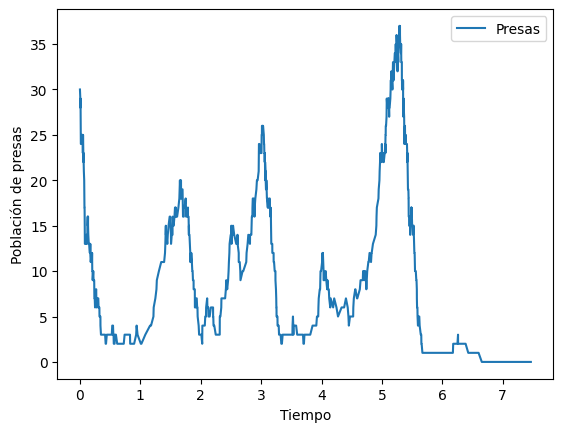

In [ ]:
# Gráfica de Presas respecto al tiempo
plt.plot(listaTiempo,listaP1,label="Presas")
plt.xlabel("Tiempo")
plt.ylabel("Población de presas")
plt.legend()
plt.show()

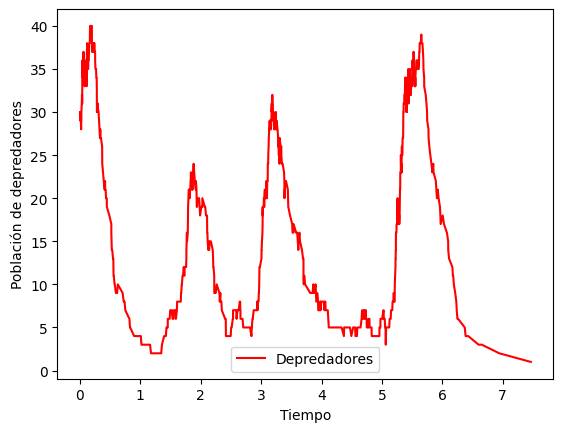

In [ ]:
#Gráfica de Depredadores respecto al tiempo
plt.plot(listaTiempo,listaD1,label="Depredadores",color = 'red')
plt.xlabel("Tiempo")
plt.ylabel("Población de depredadores")
plt.legend()
plt.show()

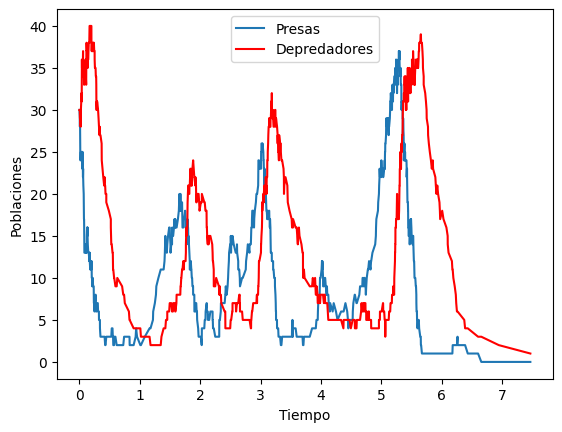

In [ ]:
#Comparación de ambos gráficos respecto al tiempo
plt.plot(listaTiempo,listaP1,label="Presas")
plt.plot(listaTiempo,listaD1,label="Depredadores",color = 'r')
plt.xlabel("Tiempo")
plt.ylabel("Poblaciones")
plt.legend()
plt.show()
#print(listaTiempo[800])

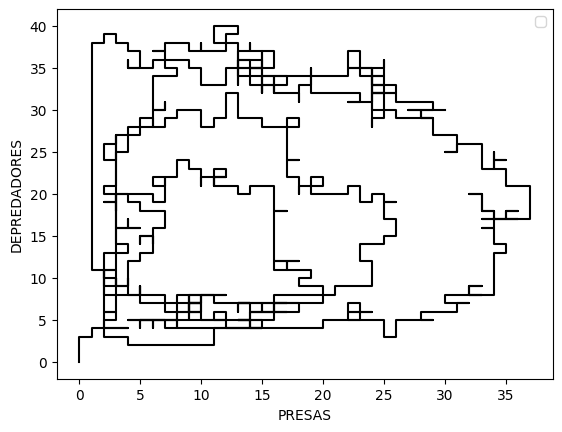

In [ ]:
#Comparación de ambos gráficos respecto a las poblaciones
plt.plot(listaP1,listaD1,color ='k')
plt.xlabel("PRESAS")
plt.ylabel("DEPREDADORES")
plt.legend()
plt.show()

In [ ]:
a = 3.5
b = 0.3
d = 0.3
c = 3.3

P = 30
D = 30
listaP1 = [P]
listaD1 = [D]


#tiempo = 0
#listaTiempo = [tiempo]

for i in range(1000):
  lmb_P_nace = a*P
  lmb_P_muere = b*P*D
  lmb_D_nace = d*D*P
  lmb_D_muere = c*D
  Delta_tp1 = np.random.exponential(1/lmb_P_nace) if lmb_P_nace > 0 else np.inf
  Delta_tp2 = np.random.exponential(1/lmb_P_muere) if lmb_P_muere > 0 else np.inf
  Delta_td1 = np.random.exponential(1/lmb_D_nace) if lmb_D_nace > 0 else np.inf
  Delta_td2 = np.random.exponential(1/lmb_D_muere) if lmb_D_muere > 0 else np.inf
  R = [Delta_tp1, Delta_tp2, Delta_td1, Delta_td2]
  t_min = min(R)

  if t_min == Delta_tp1:
    if P == 0:
      break
    else:
      P += 1
  elif t_min == Delta_tp2:
    if P == 0:
      break
    else:
      P -= 1
  elif t_min == Delta_td1:
    if D == 0:
      break
    else:
      D += 1
  elif t_min == Delta_td2:
    if D == 0:
      break
    else:
      D -= 1





  listaP1.append(P)
  listaD1.append(D)

  print(f'Iteración {i+1} --> Presas: {P}, Depredadores: {D}')

Iteración 1 --> Presas: 30, Depredadores: 29
Iteración 2 --> Presas: 29, Depredadores: 29
Iteración 3 --> Presas: 30, Depredadores: 29
Iteración 4 --> Presas: 30, Depredadores: 30
Iteración 5 --> Presas: 29, Depredadores: 30
Iteración 6 --> Presas: 29, Depredadores: 31
Iteración 7 --> Presas: 30, Depredadores: 31
Iteración 8 --> Presas: 30, Depredadores: 32
Iteración 9 --> Presas: 30, Depredadores: 33
Iteración 10 --> Presas: 30, Depredadores: 34
Iteración 11 --> Presas: 31, Depredadores: 34
Iteración 12 --> Presas: 31, Depredadores: 35
Iteración 13 --> Presas: 30, Depredadores: 35
Iteración 14 --> Presas: 29, Depredadores: 35
Iteración 15 --> Presas: 29, Depredadores: 36
Iteración 16 --> Presas: 28, Depredadores: 36
Iteración 17 --> Presas: 29, Depredadores: 36
Iteración 18 --> Presas: 29, Depredadores: 37
Iteración 19 --> Presas: 30, Depredadores: 37
Iteración 20 --> Presas: 29, Depredadores: 37
Iteración 21 --> Presas: 28, Depredadores: 37
Iteración 22 --> Presas: 28, Depredadores: 

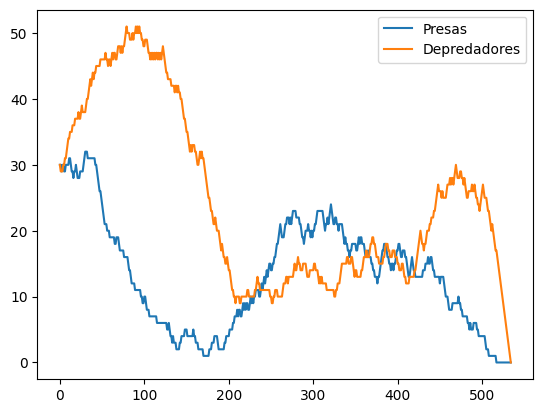

In [ ]:
plt.plot(listaP1,label="Presas")
plt.plot(listaD1,label="Depredadores")
plt.legend()
plt.show()

Iteración 1 --> Presas: 2000, Depredadores: 201
Iteración 2 --> Presas: 1999, Depredadores: 201
Iteración 3 --> Presas: 1999, Depredadores: 202
Iteración 4 --> Presas: 1999, Depredadores: 203
Iteración 5 --> Presas: 1998, Depredadores: 203
Iteración 6 --> Presas: 1997, Depredadores: 203
Iteración 7 --> Presas: 1997, Depredadores: 204
Iteración 8 --> Presas: 1996, Depredadores: 204
Iteración 9 --> Presas: 1995, Depredadores: 204
Iteración 10 --> Presas: 1994, Depredadores: 204
Iteración 11 --> Presas: 1993, Depredadores: 204
Iteración 12 --> Presas: 1992, Depredadores: 204
Iteración 13 --> Presas: 1992, Depredadores: 205
Iteración 14 --> Presas: 1992, Depredadores: 206
Iteración 15 --> Presas: 1992, Depredadores: 207
Iteración 16 --> Presas: 1992, Depredadores: 208
Iteración 17 --> Presas: 1992, Depredadores: 209
Iteración 18 --> Presas: 1991, Depredadores: 209
Iteración 19 --> Presas: 1991, Depredadores: 210
Iteración 20 --> Presas: 1991, Depredadores: 211
Iteración 21 --> Presas: 1990

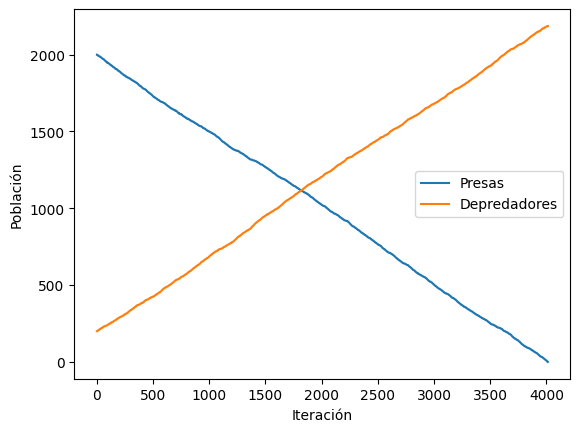

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
a = 0.9
b = 0.4
d = 0.4
c = 0.1

# Inicialización de poblaciones
P = 2000
D = 200
listaP1 = [P]
listaD1 = [D]

# Simulación
for i in range(10000):
    # Tasas de transición

    lmb_P_nace = a * P
    lmb_P_muere = b * P * D
    lmb_D_nace = d * D * P
    lmb_D_muere = c * D

    if lmb_P_nace == 0:
      break
    elif lmb_P_muere == 0:
      break
    elif lmb_D_nace == 0:
      break
    elif lmb_D_muere == 0:
      break


    # Generación de tiempos de espera para cada evento
    Delta_tp1 = np.random.exponential(1/ lmb_P_nace)  # Tiempo hasta que nacen presas
    Delta_tp2 = np.random.exponential(1/ lmb_P_muere)  # Tiempo hasta que mueren presas
    Delta_td1 = np.random.exponential( 1/lmb_D_nace)  # Tiempo hasta que nacen depredadores
    Delta_td2 = np.random.exponential( 1/lmb_D_muere) # Tiempo hasta que mueren depredadores

    # Selección del menor tiempo de transición
    R = [Delta_tp1, Delta_tp2, Delta_td1, Delta_td2]
    t_min = min(R)

    if t_min == Delta_tp1:
        if P == 0:
            break
        P += 1
    elif t_min == Delta_tp2:
        if P == 0:
            break
        P -= 1
    elif t_min == Delta_td1:
        if D == 0:
            break
        D += 1
    elif t_min == Delta_td2:
        if D == 0:
            break
        D -= 1

    # Almacenar valores de las poblaciones
    listaP1.append(P)
    listaD1.append(D)

    # Mostrar estado en cada iteración
    print(f'Iteración {i+1} --> Presas: {P}, Depredadores: {D}')

# Graficar resultados
plt.plot(listaP1, label='Presas')
plt.plot(listaD1, label='Depredadores')
plt.xlabel('Iteración')
plt.ylabel('Población')
plt.legend()
plt.show()


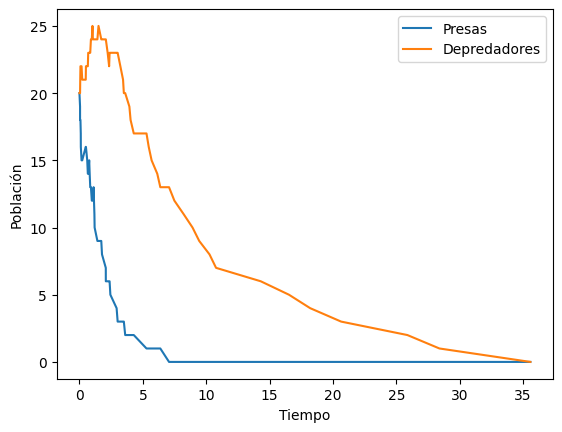

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros ajustados
a = 0.1
b = 0.02
d = 0.01
c = 0.1

# Poblaciones iniciales
P = 20
D = 20
listaP1 = [P]
listaD1 = [D]
tiempos = [0]
tiempo_actual = 0

for i in range(2000):
    # Tasas de eventos
    lmb_P_nace = a * P
    lmb_P_muere = b * P * D
    lmb_D_nace = d * D * P
    lmb_D_muere = c * D

    # Generar tiempos exponenciales para cada evento
    Delta_tp1 = np.random.exponential(1 / lmb_P_nace) if lmb_P_nace > 0 else np.inf
    Delta_tp2 = np.random.exponential(1 / lmb_P_muere) if lmb_P_muere > 0 else np.inf
    Delta_td1 = np.random.exponential(1 / lmb_D_nace) if lmb_D_nace > 0 else np.inf
    Delta_td2 = np.random.exponential(1 / lmb_D_muere) if lmb_D_muere > 0 else np.inf

    # Encuentra el evento con el menor tiempo
    R = [Delta_tp1, Delta_tp2, Delta_td1, Delta_td2]
    t_min = min(R)
    tiempo_actual += t_min

    # Actualizar poblaciones según el evento
    if t_min == Delta_tp1:
        P += 1
    elif t_min == Delta_tp2 and P > 0:
        P -= 1
    elif t_min == Delta_td1:
        D += 1
    elif t_min == Delta_td2 and D > 0:
        D -= 1

    # Registrar valores
    listaP1.append(P)
    listaD1.append(D)
    tiempos.append(tiempo_actual)

# Graficar resultados
plt.plot(tiempos, listaP1, label="Presas")
plt.plot(tiempos, listaD1, label="Depredadores")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()
plt.show()


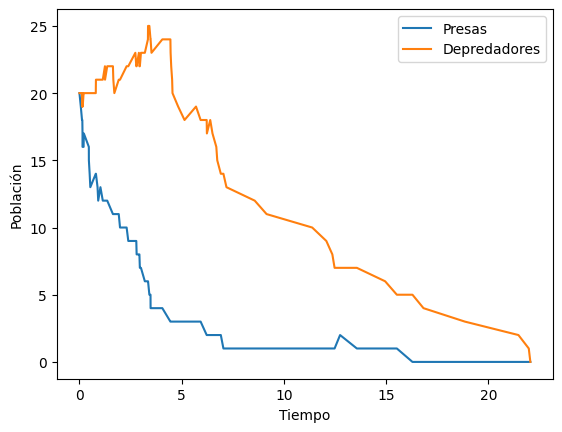

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de tasas
a = 0.1  # tasa de nacimiento de presas
b = 0.02  # tasa de depredación
d = 0.01  # tasa de nacimiento de depredadores
c = 0.1  # tasa de muerte de depredadores

# Poblaciones iniciales
P = 20  # presas
D = 20  # depredadores

# Listas para almacenar la evolución de las poblaciones
listaP = [P]
listaD = [D]
tiempos = [0]
tiempo_actual = 0

# Número de iteraciones
for i in range(2000):
    # Calcular tasas individuales
    lmb_P_nace = a * P
    lmb_P_muere = b * P * D
    lmb_D_nace = d * P * D
    lmb_D_muere = c * D

    # Sumar tasas totales
    lmb_total = lmb_P_nace + lmb_P_muere + lmb_D_nace + lmb_D_muere

    # Evitar dividir por cero
    if lmb_total == 0:
        break

    # Tiempo hasta el próximo evento
    Delta_t = np.random.exponential(1 / lmb_total)
    tiempo_actual += Delta_t

    # Seleccionar el evento basado en probabilidad relativa
    r = np.random.uniform(0, lmb_total)
    if r < lmb_P_nace:
        P += 1  # Nacimiento de presas
    elif r < lmb_P_nace + lmb_P_muere:
        if P > 0:
            P -= 1  # Muerte de presas
    elif r < lmb_P_nace + lmb_P_muere + lmb_D_nace:
        D += 1  # Nacimiento de depredadores
    else:
        if D > 0:
            D -= 1  # Muerte de depredadores

    # Almacenar poblaciones y tiempo
    listaP.append(P)
    listaD.append(D)
    tiempos.append(tiempo_actual)

# Graficar resultados
plt.plot(tiempos, listaP, label="Presas")
plt.plot(tiempos, listaD, label="Depredadores")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()
plt.show()


Tiempo 0.00 --> Presas: 19, Depredadores: 20
Tiempo 0.01 --> Presas: 19, Depredadores: 21
Tiempo 0.01 --> Presas: 20, Depredadores: 21
Tiempo 0.02 --> Presas: 19, Depredadores: 21
Tiempo 0.02 --> Presas: 19, Depredadores: 22
Tiempo 0.03 --> Presas: 18, Depredadores: 22
Tiempo 0.03 --> Presas: 18, Depredadores: 23
Tiempo 0.03 --> Presas: 18, Depredadores: 24
Tiempo 0.03 --> Presas: 17, Depredadores: 24
Tiempo 0.03 --> Presas: 16, Depredadores: 24
Tiempo 0.04 --> Presas: 16, Depredadores: 25
Tiempo 0.05 --> Presas: 16, Depredadores: 26
Tiempo 0.05 --> Presas: 16, Depredadores: 25
Tiempo 0.05 --> Presas: 15, Depredadores: 25
Tiempo 0.05 --> Presas: 14, Depredadores: 25
Tiempo 0.05 --> Presas: 14, Depredadores: 26
Tiempo 0.06 --> Presas: 14, Depredadores: 27
Tiempo 0.06 --> Presas: 13, Depredadores: 27
Tiempo 0.06 --> Presas: 13, Depredadores: 28
Tiempo 0.06 --> Presas: 13, Depredadores: 29
Tiempo 0.07 --> Presas: 12, Depredadores: 29
Tiempo 0.07 --> Presas: 11, Depredadores: 29
Tiempo 0.0

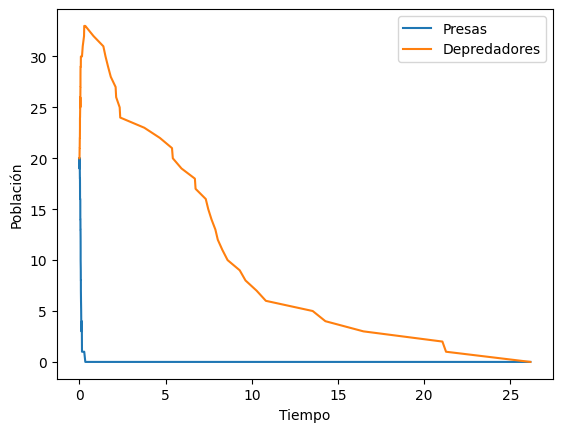

In [ ]:
a = 1.1
b = 0.4
d = 0.4
c = 0.1
K = 300  # Capacidad de carga para presas

P = 20
D = 20
listaP = [P]
listaD = [D]
listaTiempo = [0]
tiempo_total = 0

for i in range(2000):
    # Variabilidad en las tasas con el tiempo y límite de capacidad de carga
    a_actual = a + 0.2 * np.sin(i / 200)  # Variación estacional
    lmb_P_nace = a_actual * P * (1 - P / K)
    lmb_P_muere = b * P * D
    lmb_D_nace = d * D * P
    lmb_D_muere = c * D

    # Tiempo hasta el siguiente evento para cada proceso
    Delta_tp1 = np.random.exponential(1 / abs(lmb_P_nace)) if lmb_P_nace != 0 else float('inf')
    Delta_tp2 = np.random.exponential(1 / abs(lmb_P_muere)) if lmb_P_muere != 0 else float('inf')
    Delta_td1 = np.random.exponential(1 / abs(lmb_D_nace)) if lmb_D_nace != 0 else float('inf')
    Delta_td2 = np.random.exponential(1 / abs(lmb_D_muere)) if lmb_D_muere != 0 else float('inf')

    # Selección del siguiente evento
    R = [Delta_tp1, Delta_tp2, Delta_td1, Delta_td2]
    t_min = min(R)
    tiempo_total += t_min
    listaTiempo.append(tiempo_total)

    if t_min == Delta_tp1:
        P += 1
    elif t_min == Delta_tp2:
        P = max(0, P - 1)
    elif t_min == Delta_td1:
        D += 1
    elif t_min == Delta_td2:
        D = max(0, D - 1)

    listaP.append(P)
    listaD.append(D)

    print(f'Tiempo {tiempo_total:.2f} --> Presas: {P}, Depredadores: {D}')

# Graficar los resultados
plt.plot(listaTiempo, listaP, label="Presas")
plt.plot(listaTiempo, listaD, label="Depredadores")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()
plt.show()
